In [59]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [60]:
import matplotlib.pyplot as plt
import cv2

In [61]:
def mosaic(img,rect,size):
    (x1,y1,x2,y2) = rect
    w = x2 - x1
    h = y2 -y1
    i_rect = img[y1:y2,x1:x2]
    
    i_small = cv2.resize(i_rect, (size,size))
    i_mos = cv2.resize(i_small,(w,h),interpolation=cv2.INTER_AREA)
    
    img2 = img.copy()
    img2[y1:y2,x1:x2] = i_mos
    return img2

In [62]:
cascade_file = "/Users/hiro/Desktop/haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

In [63]:
img = cv2.imread("/Users/hiro/Desktop/girl.jpg")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [50]:
face_list = cascade.detectMultiScale(img_gray,minSize=(150,150))

In [51]:
if len(face_list) == 0:
    print("失敗")
    quit()

In [52]:
for (x,y,w,h) in face_list:
    print("顔の座標=",x,y,w,h)
    red = (0,0,255)
    cv2.rectangle(img,(x,y),(x+w,y+h),red,thickness=20)

顔の座標= 379 76 171 171


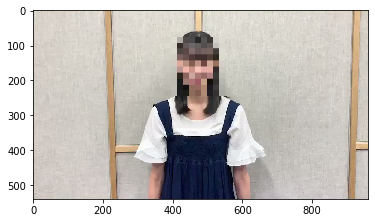

In [58]:
for (x,y,w,h) in face_list:
    img = mosaic(img,(x,y,x+w,y+h),10)
cv2.imwrite("girl-mosaic.png",img)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()